In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings

warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

# **DATA PREPROCESSING**

In [2]:
drug = pd.read_csv('webmd.csv')

In [3]:
drug.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [4]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
drug.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


Useful count min 0? This make no sense

## **DATA CLEANING**

In [6]:
df = drug [['Age', 'Condition', 'Drug', 'DrugId', 'EaseofUse',
            'Effectiveness', 'Satisfaction', 'Sex', 'Reviews',
            'UsefulCount','Sides','Date']]

In [7]:
for col in df.columns:
    if df[col].dtype.kind == "O":
        df[col] = df[col].str.strip()

In [8]:
data = [[col, df[col].nunique()] for col in df.columns.difference(["Reviews"])]
uniques = pd.DataFrame(data=data, columns=["columns", "num of unique values"])

In [9]:
uniques

,columns,num of unique values
0,Age,12
1,Condition,1806
2,Date,4524
3,Drug,7093
4,DrugId,6572
5,EaseofUse,7
6,Effectiveness,7
7,Satisfaction,7
8,Sex,3
9,Sides,1650


- Sex unique values are 3? This make no sense, since we know theres only 2 type of sex, female and male.
- Drug has more values than DrugId?
- Ease of Use, Effectiveness, Satisfaction have numbers that are ambiguous or not in the correct order. While the rating used is only up to 5

### **Missing Values**

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Age              0
Condition        0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Reviews          0
UsefulCount      0
Sides            0
Date             0
dtype: int64

**The chart above reveals about 12% new missing values in Reviews, 7% in Sex and 3% in Age. Since the missing values are relatively small we can simply drop them (simple, yet the best option)**

### **Duplicates**

In [12]:
df.duplicated().sum()

944

**There are duplicated values in dataset rows and will be dropped later**

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

**Duplicated rows have gone!**

### **Checking Each Column Values**

In [15]:
print(df["Satisfaction"].value_counts())


5     111163
1     100697
4      63031
3      51784
2      35147
6          2
10         1
Name: Satisfaction, dtype: int64


In [16]:
df = df[df['Satisfaction'] <= 5]

In [17]:
print(df["Satisfaction"].value_counts())

5    111163
1    100697
4     63031
3     51784
2     35147
Name: Satisfaction, dtype: int64


In [18]:
print(df["Effectiveness"].value_counts())

5    130022
4     81660
3     60185
1     59251
2     30704
Name: Effectiveness, dtype: int64


In [19]:
print(df["EaseofUse"].value_counts())

5    192211
4     74395
3     41166
1     35874
2     18176
Name: EaseofUse, dtype: int64


In [20]:
print(df["Sex"].value_counts())

Female    237732
Male       97657
           26433
Name: Sex, dtype: int64


In [21]:
for col in ["Age", "Sex", "Reviews", "UsefulCount", "Condition", "Sides"]:
    df = df[(df[col].astype(bool) & df[col].notnull())]

In [22]:
print(df["Sex"].value_counts())

Female    172325
Male       64724
Name: Sex, dtype: int64


In [23]:
print(df["Age"].value_counts())

45-54         55367
55-64         48746
35-44         39213
25-34         36467
65-74         24625
19-24         17627
75 or over     8434
13-18          4683
7-12           1130
3-6             501
0-2             256
Name: Age, dtype: int64


In [24]:
print(df["UsefulCount"].value_counts())

1      32307
2      26156
3      21871
4      18938
5      16587
       ...  
135        1
126        1
255        1
154        1
95         1
Name: UsefulCount, Length: 143, dtype: int64


In [25]:
print(df["Sides"].value_counts())

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                  9071
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                               7255
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                        6662
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                                     5874
Nausea ,  vomiting ,  stomach  upset,  diarrhea ,  weakness , or a  metallic taste  in the  mouth  may occur.                                                                                  3894
                    

### **Statistical Summary**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237049 entries, 1 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            237049 non-null  object
 1   Condition      237049 non-null  object
 2   Drug           237049 non-null  object
 3   DrugId         237049 non-null  int64 
 4   EaseofUse      237049 non-null  int64 
 5   Effectiveness  237049 non-null  int64 
 6   Satisfaction   237049 non-null  int64 
 7   Sex            237049 non-null  object
 8   Reviews        237049 non-null  object
 9   UsefulCount    237049 non-null  int64 
 10  Sides          237049 non-null  object
 11  Date           237049 non-null  object
dtypes: int64(5), object(7)
memory usage: 23.5+ MB


In [27]:
numericals = ['EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount']

In [28]:
df[numericals].describe()

,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,237049.000000,237049.000000,237049.000000,237049.000000
mean,4.065472,3.570688,3.124371,8.707672
std,1.298183,1.458688,1.624834,9.688730
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,1.000000,3.000000
50%,5.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,11.000000
max,5.000000,5.000000,5.000000,255.000000


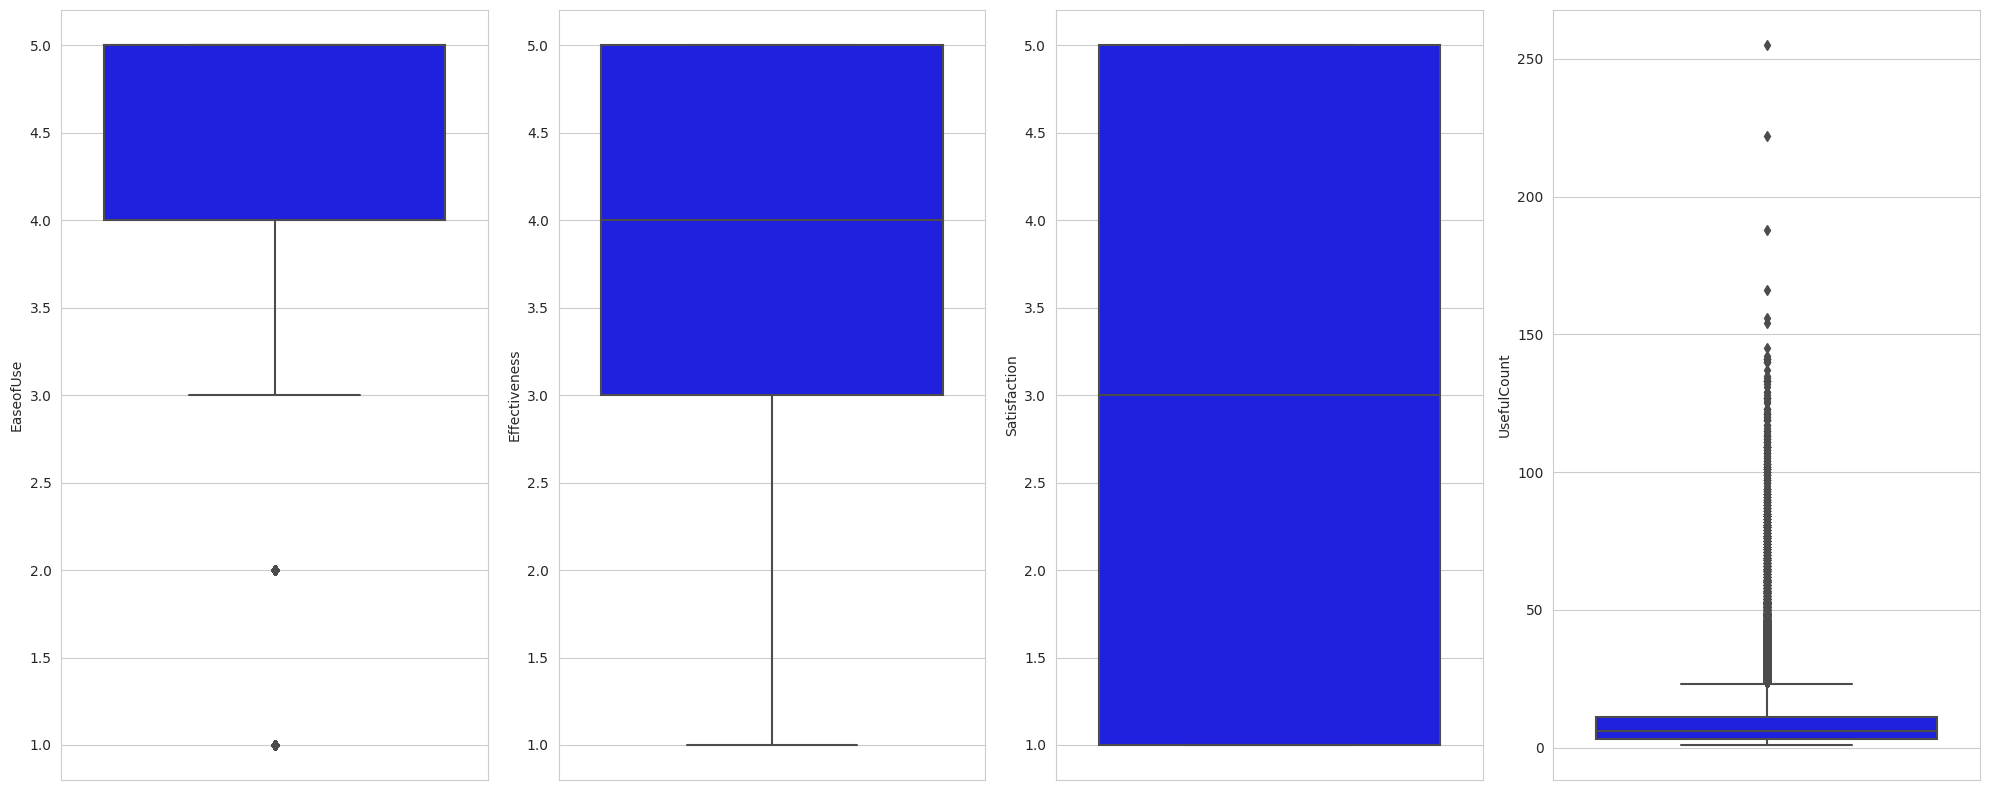

In [29]:
#outlier checking

plt.figure(figsize=(20,8))

feat_num = list(df[numericals])
for i in range(0, len(feat_num)):
    plt.subplot(1, len(feat_num), i+1)
    sns.boxplot(y=df[feat_num[i]],color='blue', orient='v')
    plt.tight_layout()

In [30]:
dfc = df.copy()

In [31]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237049 entries, 1 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            237049 non-null  object
 1   Condition      237049 non-null  object
 2   Drug           237049 non-null  object
 3   DrugId         237049 non-null  int64 
 4   EaseofUse      237049 non-null  int64 
 5   Effectiveness  237049 non-null  int64 
 6   Satisfaction   237049 non-null  int64 
 7   Sex            237049 non-null  object
 8   Reviews        237049 non-null  object
 9   UsefulCount    237049 non-null  int64 
 10  Sides          237049 non-null  object
 11  Date           237049 non-null  object
dtypes: int64(5), object(7)
memory usage: 23.5+ MB


In [32]:
len(dfc[dfc['UsefulCount'] >25])

13177

In [33]:
14565/248354

0.05864612609420424

Because of an outlier still make sense, we will not remove all Useful count of drug that are more than 25 since it is only 5% from the total data.

In [34]:
dfc.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,237049.000000,237049.000000,237049.000000,237049.000000,237049.000000
mean,35615.313252,4.065472,3.570688,3.124371,8.707672
std,51189.075287,1.298183,1.458688,1.624834,9.688730
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4896.000000,4.000000,3.000000,1.000000,3.000000
50%,9690.000000,5.000000,4.000000,3.000000,6.000000
75%,63163.000000,5.000000,5.000000,5.000000,11.000000
max,178485.000000,5.000000,5.000000,5.000000,255.000000


## **FEATURE ENGINEERING**

In [35]:
dfc.head(5)

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Reviews,UsefulCount,Sides,Date
1,25-34,Cold Symptoms,25dph-7.5peh,146724,5,5,5,Female,cleared me right up even with my throat hurtin...,1,"Drowsiness, dizziness , dry mouth /nose/thro...",1/13/2011
16,25-34,Birth Control,lyza,164750,1,1,1,Female,LYZA BIRTH CONTROL\nThese are the WORST birth ...,1,"Nausea , vomiting , headache , bloating , ...",10/7/2017
18,25-34,Birth Control,lyza,164750,5,5,4,Female,I have been taking Lyza for two months now. I ...,1,"Nausea , vomiting , headache , bloating , ...",1/30/2017
19,25-34,Birth Control,lyza,164750,2,5,1,Female,I have been on this pill for a little over two...,3,"Nausea , vomiting , headache , bloating , ...",6/1/2016
21,25-34,Birth Control,lyza,164750,5,5,4,Female,My OB/GYN placed me on this pill because I was...,10,"Nausea , vomiting , headache , bloating , ...",4/29/2016


In [36]:
dfc['Year'] = pd.to_datetime(dfc['Date'], errors='coerce').dt.year
dfc['Month'] = pd.to_datetime(dfc['Date'], errors='coerce').dt.month
dfc['day_of_week'] = pd.to_datetime(dfc['Date'], errors='coerce').dt.day_name()

In [37]:
dfc.head(5)

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Reviews,UsefulCount,Sides,Date,Year,Month,day_of_week
1,25-34,Cold Symptoms,25dph-7.5peh,146724,5,5,5,Female,cleared me right up even with my throat hurtin...,1,"Drowsiness, dizziness , dry mouth /nose/thro...",1/13/2011,2011,1,Thursday
16,25-34,Birth Control,lyza,164750,1,1,1,Female,LYZA BIRTH CONTROL\nThese are the WORST birth ...,1,"Nausea , vomiting , headache , bloating , ...",10/7/2017,2017,10,Saturday
18,25-34,Birth Control,lyza,164750,5,5,4,Female,I have been taking Lyza for two months now. I ...,1,"Nausea , vomiting , headache , bloating , ...",1/30/2017,2017,1,Monday
19,25-34,Birth Control,lyza,164750,2,5,1,Female,I have been on this pill for a little over two...,3,"Nausea , vomiting , headache , bloating , ...",6/1/2016,2016,6,Wednesday
21,25-34,Birth Control,lyza,164750,5,5,4,Female,My OB/GYN placed me on this pill because I was...,10,"Nausea , vomiting , headache , bloating , ...",4/29/2016,2016,4,Friday


In [38]:
dfc = dfc.drop(columns=['DrugId'])

In [39]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237049 entries, 1 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            237049 non-null  object
 1   Condition      237049 non-null  object
 2   Drug           237049 non-null  object
 3   EaseofUse      237049 non-null  int64 
 4   Effectiveness  237049 non-null  int64 
 5   Satisfaction   237049 non-null  int64 
 6   Sex            237049 non-null  object
 7   Reviews        237049 non-null  object
 8   UsefulCount    237049 non-null  int64 
 9   Sides          237049 non-null  object
 10  Date           237049 non-null  object
 11  Year           237049 non-null  int64 
 12  Month          237049 non-null  int64 
 13  day_of_week    237049 non-null  object
dtypes: int64(6), object(8)
memory usage: 27.1+ MB


# **DATA PREPROCESSING SENTIMENT**

## Cleaning The Text

In [40]:
dfsent = dfc.copy()

In [41]:

import string
import re

In [42]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
dfsent['cleaned_text'] = dfsent['Reviews'].apply(lambda x: clean_text(x))
dfsent['label'] = dfsent['Satisfaction'].map({1.0:0, 2.0:0, 3.0:1, 4.0:1, 5.0:1})

## Adding additional features - length of, and percentage of punctuations in the text

In [43]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
dfsent['Review_len'] = dfsent['Reviews'].apply(lambda x: len(x) - x.count(" "))
dfsent['punct'] = dfsent['Reviews'].apply(lambda x: count_punct(x))
dfsent.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Reviews,UsefulCount,Sides,Date,Year,Month,day_of_week,cleaned_text,label,Review_len,punct
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female,cleared me right up even with my throat hurtin...,1,"Drowsiness, dizziness , dry mouth /nose/thro...",1/13/2011,2011,1,Thursday,cleared me right up even with my throat hurtin...,1,71,0.0
16,25-34,Birth Control,lyza,1,1,1,Female,LYZA BIRTH CONTROL\nThese are the WORST birth ...,1,"Nausea , vomiting , headache , bloating , ...",10/7/2017,2017,10,Saturday,lyza birth control these are the worst birth c...,0,394,4.8
18,25-34,Birth Control,lyza,5,5,4,Female,I have been taking Lyza for two months now. I ...,1,"Nausea , vomiting , headache , bloating , ...",1/30/2017,2017,1,Monday,i have been taking lyza for two months now i ...,1,288,3.5
19,25-34,Birth Control,lyza,2,5,1,Female,I have been on this pill for a little over two...,3,"Nausea , vomiting , headache , bloating , ...",6/1/2016,2016,6,Wednesday,i have been on this pill for a little over two...,0,302,3.3
21,25-34,Birth Control,lyza,5,5,4,Female,My OB/GYN placed me on this pill because I was...,10,"Nausea , vomiting , headache , bloating , ...",4/29/2016,2016,4,Friday,my ob gyn placed me on this pill because i was...,1,595,3.9


## Tokenization

In [44]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
dfsent['tokens'] = dfsent['cleaned_text'].apply(lambda x: tokenize_text(x))
dfsent.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Reviews,UsefulCount,Sides,Date,Year,Month,day_of_week,cleaned_text,label,Review_len,punct,tokens
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female,cleared me right up even with my throat hurtin...,1,"Drowsiness, dizziness , dry mouth /nose/thro...",1/13/2011,2011,1,Thursday,cleared me right up even with my throat hurtin...,1,71,0.0,"[cleared, me, right, up, even, with, my, throa..."
16,25-34,Birth Control,lyza,1,1,1,Female,LYZA BIRTH CONTROL\nThese are the WORST birth ...,1,"Nausea , vomiting , headache , bloating , ...",10/7/2017,2017,10,Saturday,lyza birth control these are the worst birth c...,0,394,4.8,"[lyza, birth, control, these, are, the, worst,..."
18,25-34,Birth Control,lyza,5,5,4,Female,I have been taking Lyza for two months now. I ...,1,"Nausea , vomiting , headache , bloating , ...",1/30/2017,2017,1,Monday,i have been taking lyza for two months now i ...,1,288,3.5,"[i, have, been, taking, lyza, for, two, months..."
19,25-34,Birth Control,lyza,2,5,1,Female,I have been on this pill for a little over two...,3,"Nausea , vomiting , headache , bloating , ...",6/1/2016,2016,6,Wednesday,i have been on this pill for a little over two...,0,302,3.3,"[i, have, been, on, this, pill, for, a, little..."
21,25-34,Birth Control,lyza,5,5,4,Female,My OB/GYN placed me on this pill because I was...,10,"Nausea , vomiting , headache , bloating , ...",4/29/2016,2016,4,Friday,my ob gyn placed me on this pill because i was...,1,595,3.9,"[my, ob, gyn, placed, me, on, this, pill, beca..."


## Lemmatization and Removing Stopwords

In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
dfsent['lemmatized_review'] = dfsent['tokens'].apply(lambda x: lemmatize_text(x))
dfsent.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Reviews,UsefulCount,Sides,Date,Year,Month,day_of_week,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female,cleared me right up even with my throat hurtin...,1,"Drowsiness, dizziness , dry mouth /nose/thro...",1/13/2011,2011,1,Thursday,cleared me right up even with my throat hurtin...,1,71,0.0,"[cleared, me, right, up, even, with, my, throa...",cleared right even throat hurting went away ta...
16,25-34,Birth Control,lyza,1,1,1,Female,LYZA BIRTH CONTROL\nThese are the WORST birth ...,1,"Nausea , vomiting , headache , bloating , ...",10/7/2017,2017,10,Saturday,lyza birth control these are the worst birth c...,0,394,4.8,"[lyza, birth, control, these, are, the, worst,...",lyza birth control worst birth control pill ev...
18,25-34,Birth Control,lyza,5,5,4,Female,I have been taking Lyza for two months now. I ...,1,"Nausea , vomiting , headache , bloating , ...",1/30/2017,2017,1,Monday,i have been taking lyza for two months now i ...,1,288,3.5,"[i, have, been, taking, lyza, for, two, months...",taking lyza two month anxious going back pill ...
19,25-34,Birth Control,lyza,2,5,1,Female,I have been on this pill for a little over two...,3,"Nausea , vomiting , headache , bloating , ...",6/1/2016,2016,6,Wednesday,i have been on this pill for a little over two...,0,302,3.3,"[i, have, been, on, this, pill, for, a, little...",pill little two month experience horrible know...
21,25-34,Birth Control,lyza,5,5,4,Female,My OB/GYN placed me on this pill because I was...,10,"Nausea , vomiting , headache , bloating , ...",4/29/2016,2016,4,Friday,my ob gyn placed me on this pill because i was...,1,595,3.9,"[my, ob, gyn, placed, me, on, this, pill, beca...",ob gyn placed pill risk stroke estrogen birth ...


In [47]:
dfsent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237049 entries, 1 to 362805
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                237049 non-null  object 
 1   Condition          237049 non-null  object 
 2   Drug               237049 non-null  object 
 3   EaseofUse          237049 non-null  int64  
 4   Effectiveness      237049 non-null  int64  
 5   Satisfaction       237049 non-null  int64  
 6   Sex                237049 non-null  object 
 7   Reviews            237049 non-null  object 
 8   UsefulCount        237049 non-null  int64  
 9   Sides              237049 non-null  object 
 10  Date               237049 non-null  object 
 11  Year               237049 non-null  int64  
 12  Month              237049 non-null  int64  
 13  day_of_week        237049 non-null  object 
 14  cleaned_text       237049 non-null  object 
 15  label              237049 non-null  int64  
 16  Re

# **EDA SENTIMENT**

In [48]:
# Missing values in the dataset
print(f"Number of null in label: { dfsent['Satisfaction'].isnull().sum() }")
print(f"Number of null in text: { dfsent['Reviews'].isnull().sum()}")


Number of null in label: 0
Number of null in text: 0


## **Visualizing Word Clouds**

In [49]:
df_negative = dfsent[ (dfsent['Satisfaction']==1.0)
| (dfsent['Satisfaction']==2.0)]

df_positive = dfsent[ (dfsent['Satisfaction']==3.0)
| (dfsent['Satisfaction']==4.0) | (dfsent['Satisfaction']==5.0)]

#convert to list
negative_list= df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list))
#convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
#convert the list into a string of ham
filtered_positive = filtered_positive.lower()

## Positive Reviews

In [50]:
pip install wordcloud

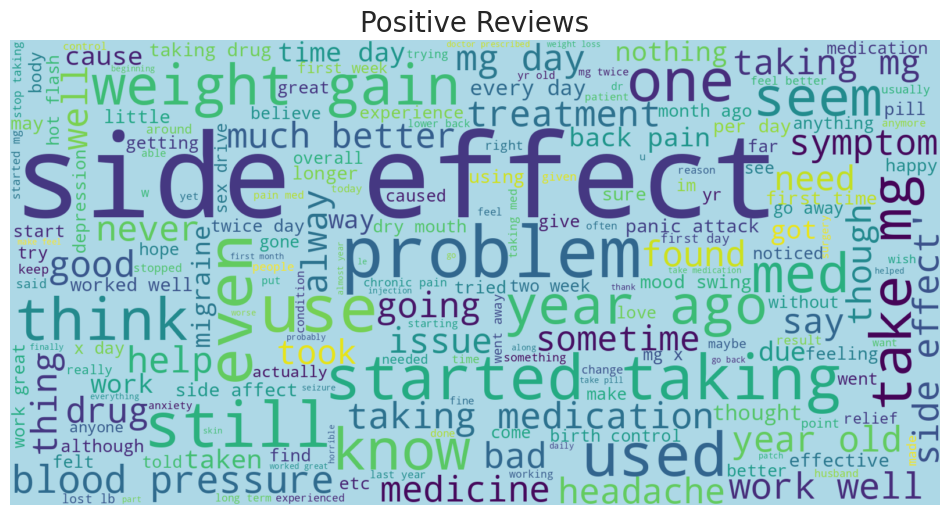

In [51]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color='lightblue',
                      width=1600, height=800,
                      max_font_size=200).generate(filtered_positive)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Positive Reviews', fontsize = 20)
plt.axis("off")
plt.show()

## Negative Reviews

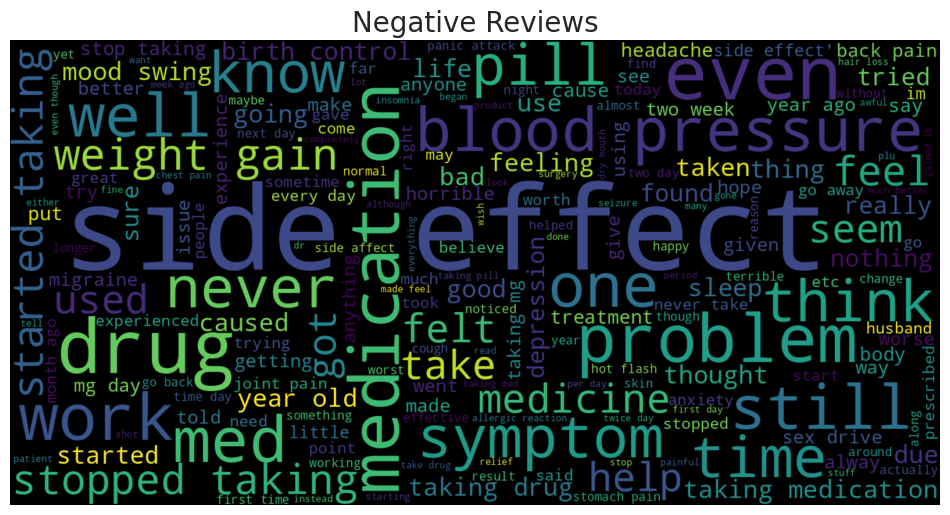

In [52]:
wordcloud = WordCloud(width=1600, height=800,
                      max_font_size=200).generate(filtered_negative)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Negative Reviews', fontsize = 20)
plt.axis("off")
plt.show()

<Figure size 700x600 with 0 Axes>

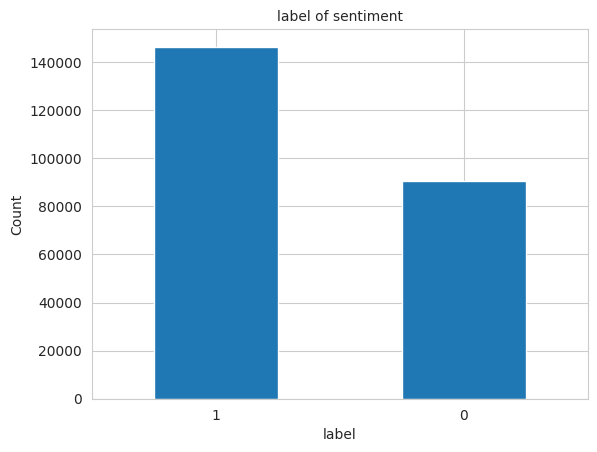

<Figure size 700x600 with 0 Axes>

In [53]:
dfsent['label'].value_counts().plot(kind='bar')
plt.title("label of sentiment", fontsize = 10)
plt.xlabel("label", fontsize = 10)
plt.xticks(rotation=0)
plt.ylabel("Count", fontsize = 10)
plt.figure(figsize=(7,6))

# **FEATURE EXTRACTION FROM TEXT**

In [54]:
dfsamp = dfsent.sample(frac=0.1, random_state=42)
 # due to dataset is too large, so we can use sample dataset

In [55]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfsamp, test_size=0.25, random_state=0,
                                       stratify=dfsamp["label"])
train_index = train_set.index
test_index = test_set.index
print(train_set.shape)
print(test_set.shape)

(17778, 20)
(5927, 20)


# **VISUALIZE CONFUSION MATRIX**



* ### Vectorizer : TF-IDF



In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_set["lemmatized_review"]).toarray()
X_test = vectorizer.transform(test_set["lemmatized_review"]).toarray()
y_train = train_set["label"].values
y_test = test_set["label"].values

## Algorithm Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB(alpha=1.0)
model_nb.fit(X_train, y_train)

MultinomialNB()

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': (0.1, 0.5, 1.0, 1.5, 2.0),
    'fit_prior': [True, False],}

model_nb_gridcv = GridSearchCV(model_nb, parameters, cv=5, scoring='precision')
model_nb_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': (0.1, 0.5, 1.0, 1.5, 2.0),
                         'fit_prior': [True, False]},
             scoring='precision')

In [61]:
# the compact results
cv_result = pd.DataFrame(model_nb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'alpha': 0.1, 'fit_prior': True}",0.740198,3
1,"{'alpha': 0.1, 'fit_prior': False}",0.807691,1
2,"{'alpha': 0.5, 'fit_prior': True}",0.703616,6
3,"{'alpha': 0.5, 'fit_prior': False}",0.779980,2
4,"{'alpha': 1.0, 'fit_prior': True}",0.669357,8
5,"{'alpha': 1.0, 'fit_prior': False}",0.739973,4
6,"{'alpha': 1.5, 'fit_prior': True}",0.650010,9
7,"{'alpha': 1.5, 'fit_prior': False}",0.713542,5
8,"{'alpha': 2.0, 'fit_prior': True}",0.639246,10
9,"{'alpha': 2.0, 'fit_prior': False}",0.695454,7


In [62]:
class_train = (classification_report(y_train, model_nb_gridcv.best_estimator_.predict(X_train)))
print(f"\nClassification in train set:\n{class_train}")
predictions = model_nb_gridcv.best_estimator_.predict(X_test)
class_test = classification_report(y_test, predictions)
print(f"\nClassification in test set:\n{class_test}\n")



Classification in train set:
              precision    recall  f1-score   support

           0       0.82      0.88      0.84      6821
           1       0.92      0.88      0.90     10957

    accuracy                           0.88     17778
   macro avg       0.87      0.88      0.87     17778
weighted avg       0.88      0.88      0.88     17778


Classification in test set:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2274
           1       0.80      0.76      0.78      3653

    accuracy                           0.74      5927
   macro avg       0.72      0.73      0.73      5927
weighted avg       0.74      0.74      0.74      5927




## Algorithm Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(min_samples_split=6, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=6, random_state=0)

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

model_rf_gridcv = GridSearchCV(model_rf, parameters, cv=5, scoring='precision')
model_rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_split=6,
                                              random_state=0),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='precision')

In [72]:
# the results
cv_result = pd.DataFrame(model_rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.617014,1
15,"{'max_depth': 4, 'n_estimators': 10}",0.616606,2
21,"{'max_depth': 5, 'n_estimators': 20}",0.616393,3
10,"{'max_depth': 3, 'n_estimators': 10}",0.616371,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.616358,5
17,"{'max_depth': 4, 'n_estimators': 30}",0.616358,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.616358,6
0,"{'max_depth': 1, 'n_estimators': 10}",0.616324,8
19,"{'max_depth': 4, 'n_estimators': 50}",0.616324,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.616324,8


In [73]:
class_train = (classification_report(y_train, model_rf_gridcv.best_estimator_.predict(X_train)))
print(f"\nClassification in train set:\n{class_train}")
predictions = model_rf_gridcv.best_estimator_.predict(X_test)
class_test = classification_report(y_test, predictions)
print(f"\nClassification in test set:\n{class_test}\n")


Classification in train set:
              precision    recall  f1-score   support

           0       0.88      0.01      0.03      6821
           1       0.62      1.00      0.76     10957

    accuracy                           0.62     17778
   macro avg       0.75      0.51      0.40     17778
weighted avg       0.72      0.62      0.48     17778


Classification in test set:
              precision    recall  f1-score   support

           0       0.88      0.01      0.02      2274
           1       0.62      1.00      0.76      3653

    accuracy                           0.62      5927
   macro avg       0.75      0.51      0.39      5927
weighted avg       0.72      0.62      0.48      5927




## Algorithm KNeighbors Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

model_kn_gridcv = GridSearchCV(model_kn, parameters, cv=5, scoring='precision')
model_kn_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='precision')

In [76]:
# the compact results
cv_result = pd.DataFrame(model_kn_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.628901,6
1,{'n_neighbors': 3},0.618887,7
2,{'n_neighbors': 4},0.652584,4
3,{'n_neighbors': 5},0.637666,5
4,{'n_neighbors': 6},0.673379,2
5,{'n_neighbors': 7},0.652817,3
6,{'n_neighbors': 8},0.681804,1


In [77]:
class_train = (classification_report(y_train, model_kn_gridcv.best_estimator_.predict(X_train)))
print(f"\nClassification in train set:\n{class_train}")
predictions = model_kn_gridcv.best_estimator_.predict(X_test)
class_test = classification_report(y_test, predictions)
print(f"\nClassification in test set:\n{class_test}\n")



Classification in train set:
              precision    recall  f1-score   support

           0       0.85      0.47      0.61      6821
           1       0.74      0.95      0.83     10957

    accuracy                           0.77     17778
   macro avg       0.80      0.71      0.72     17778
weighted avg       0.79      0.77      0.75     17778


Classification in test set:
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      2274
           1       0.67      0.88      0.76      3653

    accuracy                           0.66      5927
   macro avg       0.64      0.59      0.58      5927
weighted avg       0.65      0.66      0.62      5927




## Algorithm Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [79]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']}

model_lr_gridcv = GridSearchCV(model_lr, parameters, cv=5, scoring='precision')
model_lr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='precision')

In [80]:
# the compact results
cv_result = pd.DataFrame(model_lr_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': 'l1'}",NaN,7
1,"{'C': 0.001, 'penalty': 'l2'}",0.616324,5
2,"{'C': 0.01, 'penalty': 'l1'}",NaN,7
3,"{'C': 0.01, 'penalty': 'l2'}",0.616324,5
4,"{'C': 0.1, 'penalty': 'l1'}",NaN,7
5,"{'C': 0.1, 'penalty': 'l2'}",0.701469,4
6,"{'C': 1, 'penalty': 'l1'}",NaN,7
7,"{'C': 1, 'penalty': 'l2'}",0.777223,2
8,"{'C': 10, 'penalty': 'l1'}",NaN,7
9,"{'C': 10, 'penalty': 'l2'}",0.785705,1


In [81]:
class_train = (classification_report(y_train, model_lr_gridcv.best_estimator_.predict(X_train)))
print(f"\nClassification in train set:\n{class_train}")
predictions = model_lr_gridcv.predict(X_test)
class_test = classification_report(y_test, predictions)
print(f"\nClassification in test set:\n{class_test}\n")




Classification in train set:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6821
           1       0.92      0.95      0.93     10957

    accuracy                           0.92     17778
   macro avg       0.92      0.91      0.91     17778
weighted avg       0.92      0.92      0.92     17778


Classification in test set:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2274
           1       0.80      0.84      0.82      3653

    accuracy                           0.77      5927
   macro avg       0.76      0.75      0.75      5927
weighted avg       0.77      0.77      0.77      5927




# **PERFORMING K-FOLD CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import KFold

best_model_nb = MultinomialNB(alpha=0.1, fit_prior=False)
best_model_lr = LogisticRegression(C=10, penalty='l2')
best_model_rf = RandomForestClassifier(min_samples_split=6, random_state=0)
best_model_knn = KNeighborsClassifier(n_neighbors=8)

models = [best_model_nb, best_model_lr, best_model_rf, best_model_knn]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "KNN"]

# Tentukan jumlah fold untuk cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for model, name in zip(models, names):
    print(name)
    for score in ["precision"]:
        scores = cross_val_score(model, X_train, y_train, scoring=score, cv=kf)
        print(f" {score} - {scores.mean()} ")
    print()


Naive Bayes
 precision - 0.7073518679279925 

Logistic Regression
